<a href="https://colab.research.google.com/github/ashmit009/MINIBOONE-ML-PROJECT/blob/main/HeartFaliure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [7]:
# Load your dataset
data = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')

# Display the first few rows of the dataset
print(data.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

In [8]:
# Get basic information about the dataset
print(data.info())

# Summary statistics of numerical columns
print(data.describe())

# Count of missing values in each column
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None
             

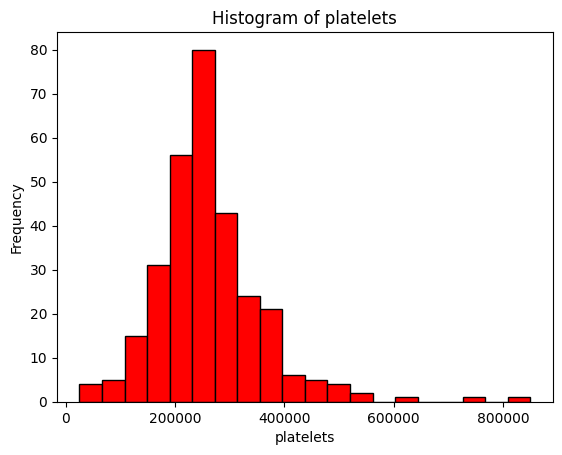

In [9]:
import matplotlib.pyplot as plt

# Histogram of the 'age' column
plt.hist(data['platelets'], bins=20, color='red', edgecolor='black')
plt.xlabel('platelets')
plt.ylabel('Frequency')
plt.title('Histogram of platelets')
plt.show()


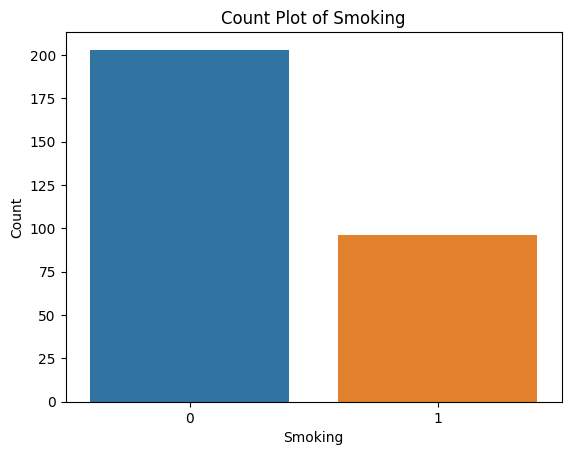

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for the 'smoking' column
sns.countplot(x='smoking', data=data)
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.title('Count Plot of Smoking')
plt.show()


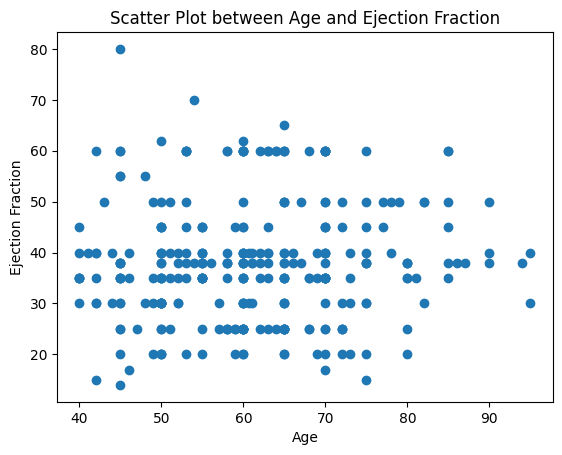

In [11]:
import matplotlib.pyplot as plt

# Scatter plot for 'age' and 'ejection_fraction'
plt.scatter(data['age'], data['ejection_fraction'])
plt.xlabel('Age')
plt.ylabel('Ejection Fraction')
plt.title('Scatter Plot between Age and Ejection Fraction')
plt.show()


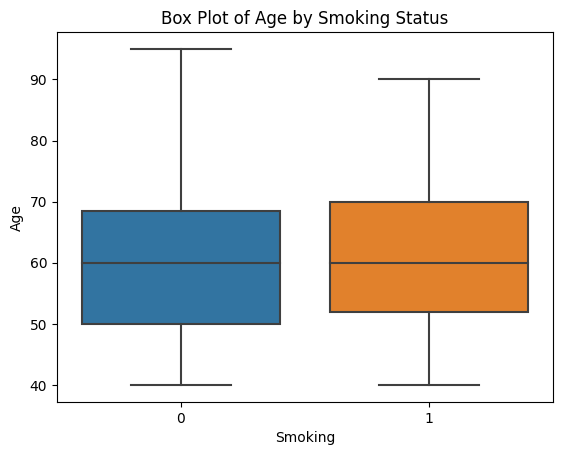

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for 'age' by 'smoking'
sns.boxplot(x='smoking', y='age', data=data)
plt.xlabel('Smoking')
plt.ylabel('Age')
plt.title('Box Plot of Age by Smoking Status')
plt.show()


In [13]:
data = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')

In [14]:
# Step 2: Separate features and target variable
X = data.drop('DEATH_EVENT', axis=1)  # Features
y = data['DEATH_EVENT']  # Target variable


In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Step 4: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Step 5: Apply PCA for dimensionality reduction
pca = PCA(n_components=5)  # Specify the number of components you want to keep
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [18]:
# Step 6: Apply LDA for dimensionality reduction
lda = LinearDiscriminantAnalysis(n_components=1)  # Specify the number of components you want to keep
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

In [19]:
# Step 7: Train a logistic regression model on original features
model_original = LogisticRegression(random_state=42)
model_original.fit(X_train_scaled, y_train)
y_pred_original = model_original.predict(X_test_scaled)
accuracy_original = accuracy_score(y_test, y_pred_original)
print(f'Accuracy with original features: {accuracy_original}')

Accuracy with original features: 0.8


In [20]:
# Step 8: Train a logistic regression model on PCA-transformed features
model_pca = LogisticRegression(random_state=42)
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f'Accuracy with PCA: {accuracy_pca}')

Accuracy with PCA: 0.7333333333333333


In [21]:
# Step 9: Train a logistic regression model on LDA-transformed features
model_lda = LogisticRegression(random_state=42)
model_lda.fit(X_train_lda, y_train)
y_pred_lda = model_lda.predict(X_test_lda)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print(f'Accuracy with LDA: {accuracy_lda}')

Accuracy with LDA: 0.8


In [22]:
y_pred_original = model_original.predict(X_test_scaled)
y_pred_pca = model_pca.predict(X_test_pca)
y_pred_lda = model_lda.predict(X_test_lda)


In [23]:
print(f'Accuracy with original features: {accuracy_original}')
print(f'Accuracy with PCA: {accuracy_pca}')
print(f'Accuracy with LDA: {accuracy_lda}')

Accuracy with original features: 0.8
Accuracy with PCA: 0.7333333333333333
Accuracy with LDA: 0.8


In [25]:
# Evaluate and compare the models
accuracy_original = accuracy_score(y_test, y_pred_original)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
accuracy_lda = accuracy_score(y_test, y_pred_lda)


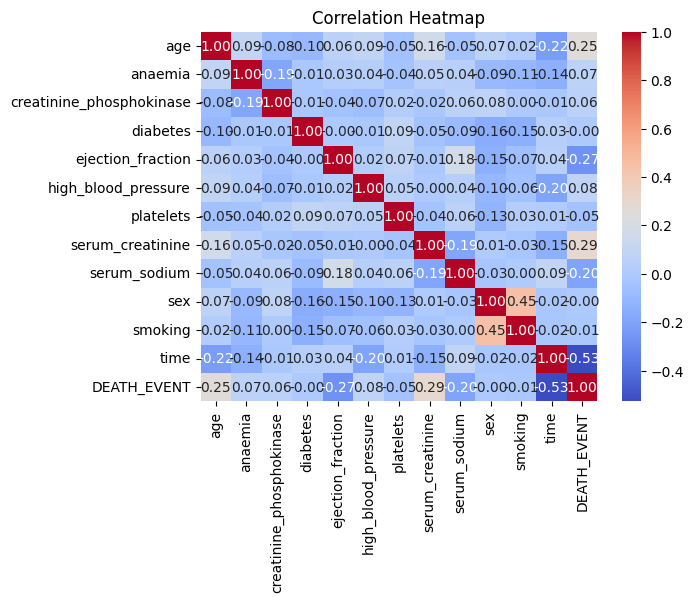

In [26]:


# Correlation matrix
correlation_matrix = data.corr()

# Heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [27]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
# Classification report for each model
print('\nClassification Report for Original Features:')
print(classification_report(y_test, y_pred_original))

print('\nClassification Report for PCA Transformed Features:')
print(classification_report(y_test, y_pred_pca))

print('\nClassification Report for LDA Transformed Features:')
print(classification_report(y_test, y_pred_lda))


Classification Report for Original Features:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.78        60
weighted avg       0.83      0.80      0.79        60


Classification Report for PCA Transformed Features:
              precision    recall  f1-score   support

           0       0.69      1.00      0.81        35
           1       1.00      0.36      0.53        25

    accuracy                           0.73        60
   macro avg       0.84      0.68      0.67        60
weighted avg       0.82      0.73      0.70        60


Classification Report for LDA Transformed Features:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                  

In [ ]:
# Confusion matrix for each model
conf_matrix_original = confusion_matrix(y_test, y_pred_original)
conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)

# Print confusion matrices
print('\nConfusion Matrix for Original Features:')
print(conf_matrix_original)

print('\nConfusion Matrix for PCA Transformed Features:')
print(conf_matrix_pca)

print('\nConfusion Matrix for LDA Transformed Features:')
print(conf_matrix_lda)


Confusion Matrix for Original Features:
[[34  1]
 [11 14]]

Confusion Matrix for PCA Transformed Features:
[[35  0]
 [16  9]]

Confusion Matrix for LDA Transformed Features:
[[34  1]
 [11 14]]


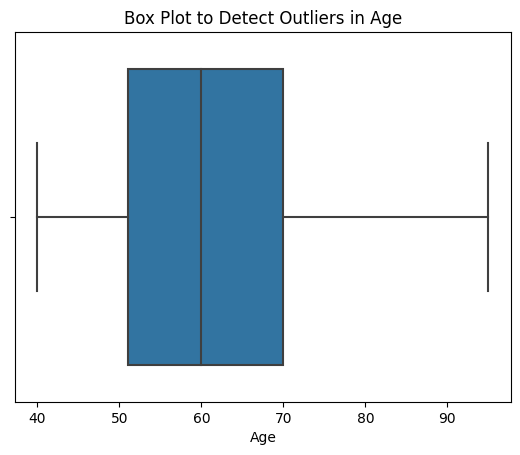

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Detect and visualize outliers using a box plot
sns.boxplot(x='age', data=data)
plt.xlabel('Age')
plt.title('Box Plot to Detect Outliers in Age')
plt.show()
